# Natural language processing (NLP) is about developing applications and services that are able to understand human languages.

### Install NLTK Packages

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

#### Tokenize Text Using Pure Python

We will use the urllib module to crawl the web page to analyse the text

In [2]:
import urllib.request
response = urllib.request.urlopen('http://php.net/')
html = response.read()
print (html)

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="shortcut icon" href="http://php.net/favicon.ico">\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="http://php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type="application/atom+xml" href="http://php.net/feed.atom" title="PHP: Hypertext Preprocessor">\n\n <link rel="canonical" href="http://php.net/index.php">\n <link rel="shorturl" href="http://php.net/index">\n <link rel="alternate" href="http://php.net/index" hreflang="x-default">\n\n\n\n<link rel="stylesheet" type="text/css" href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen">\n<link rel="styles

The printed output, the result contains a lot of HTML tags that need to be cleaned. We can use BeautifulSoup to clean the grabbed text like this:

In [3]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)
print (text)

PHP: Hypertext PreprocessorDownloadsDocumentationGet InvolvedHelpGetting StartedIntroductionA simple tutorialLanguage ReferenceBasic syntaxTypesVariablesConstantsExpressionsOperatorsControl StructuresFunctionsClasses and ObjectsNamespacesErrorsExceptionsGeneratorsReferences ExplainedPredefined VariablesPredefined ExceptionsPredefined Interfaces and ClassesContext options and parametersSupported Protocols and WrappersSecurityIntroductionGeneral considerationsInstalled as CGI binaryInstalled as an Apache moduleSession SecurityFilesystem SecurityDatabase SecurityError ReportingUsing Register GlobalsUser Submitted DataMagic QuotesHiding PHPKeeping CurrentFeaturesHTTP authentication with PHPCookiesSessionsDealing with XFormsHandling file uploadsUsing remote filesConnection handlingPersistent Database ConnectionsSafe ModeCommand line usageGarbage CollectionDTrace Dynamic TracingFunction ReferenceAffecting PHP's BehaviourAudio Formats ManipulationAuthentication ServicesCommand Line Specific E

Convert text into tokens by splitting the text

In [4]:
tokens = [t for t in text.split()] 
print (tokens)

['PHP:', 'Hypertext', 'PreprocessorDownloadsDocumentationGet', 'InvolvedHelpGetting', 'StartedIntroductionA', 'simple', 'tutorialLanguage', 'ReferenceBasic', 'syntaxTypesVariablesConstantsExpressionsOperatorsControl', 'StructuresFunctionsClasses', 'and', 'ObjectsNamespacesErrorsExceptionsGeneratorsReferences', 'ExplainedPredefined', 'VariablesPredefined', 'ExceptionsPredefined', 'Interfaces', 'and', 'ClassesContext', 'options', 'and', 'parametersSupported', 'Protocols', 'and', 'WrappersSecurityIntroductionGeneral', 'considerationsInstalled', 'as', 'CGI', 'binaryInstalled', 'as', 'an', 'Apache', 'moduleSession', 'SecurityFilesystem', 'SecurityDatabase', 'SecurityError', 'ReportingUsing', 'Register', 'GlobalsUser', 'Submitted', 'DataMagic', 'QuotesHiding', 'PHPKeeping', 'CurrentFeaturesHTTP', 'authentication', 'with', 'PHPCookiesSessionsDealing', 'with', 'XFormsHandling', 'file', 'uploadsUsing', 'remote', 'filesConnection', 'handlingPersistent', 'Database', 'ConnectionsSafe', 'ModeComman

### Count Word Frequency

Calculate the frequency distribution of those tokens using Python NLTK. There is a function in NLTK called FreqDist() that does the job:

In [5]:
freq = nltk.FreqDist(tokens) 
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

DataMagic:1
encouraged:12
5.The:1
options:1
releases:5
helping:18
page)/Focus:1
7.1.26.:1
final:3
ConnectionsSafe:1
also:26
Conference:1
XFormsHandling:1
line:1
most:1
next:20
RC2,:1
PHPKeeping:1
GenerationMail:1
second:2
announces:12
©:1
7.2:4
Basic:1
to:43
ExplainedPredefined:1
sitesPrivacy:1
Candidate:14
3,:2
nNext:1
7.2.2.:1
1.:2
NOT:18
recorded:7
Register:1
2019User:1
bugs:6
StructuresFunctionsClasses:1
7.3.0.beta2:1
ExtensionsCompression:1
GroupMy:1
world.Download7.1.26·Release:1
October:2
7.3.0beta2.:1
release:79
wiki.Thank:4
can:78
listed:8
read:23
file:1
improvements:1
VariablesPredefined:1
7.3.0beta3:1
start:2
itemg:1
fifth:1
7.2.0.:4
Control:1
your:3
more:17
7.3.0RC2:2
us:18
7.3.0.beta1:1
Time:1
ExtensionsKeyboard:1
considerationsInstalled:1
7.3.0:23
scripting:1
31th:1
22nd.The:1
You:5
7.3.06:1
7.3.0RC6.:1
theChangeLog.Please:2
release.:3
several:4
Group:1
7.3.0RC4:2
4:2
7.1,:2
system.THIS:17
page.Please:1
IT:17
ReferenceAffecting:1
been:1
ReleasedThe:23
pageg:1
7.3.0beta1:1

If we search the output, we'll find that the most frequent token is PHP. We can plot a graph for those tokens using plot function like this:

In [6]:
freq.plot(20, cumulative = False)

<Figure size 640x480 with 1 Axes>

From the graph, we can be sure that this article is talking about PHP. Great! There are some words like "the," "of," "a," "an," and so on. These words are stop words. Generally, stop words should be removed to prevent them from affecting our results.

## Remove Stop Words Using NLTK

In [7]:
from nltk.corpus import stopwords
stopwords.words('english')

clean_tokens = tokens[:] 
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

In [8]:
freq = nltk.FreqDist(clean_tokens) 
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

DataMagic:1
encouraged:12
5.The:1
options:1
releases:5
ExtensionsWeb:1
page)/Focus:1
7.1.26.:1
final:3
ConnectionsSafe:1
also:26
Conference:1
XFormsHandling:1
line:1
next:20
PHPKeeping:1
GenerationMail:1
second:2
announces:12
©:1
7.2:4
Basic:1
ExplainedPredefined:1
sitesPrivacy:1
Candidate:14
3,:2
version,:7
7.2.2.:1
1.:2
NOT:18
recorded:7
Register:1
2019User:1
bugs:6
StructuresFunctionsClasses:1
7.3.0.beta2:1
flexible:1
October:2
Time:1
release:79
wiki.Thank:4
listed:8
immediate:12
file:1
improvements:1
VariablesPredefined:1
7.3.0beta3:1
start:2
itemg:1
fifth:1
7.3.0RC5.:1
Control:1
Jul:3
7.3.0RC2:2
us:18
7.3.0.beta1:1
world.Download7.1.26·Release:1
ExtensionsKeyboard:1
ExtensionsDate:1
considerationsInstalled:1
7.3.0:23
scripting:1
31th:1
22nd.The:1
You:5
7.3.06:1
7.3.0RC6.:1
theChangeLog.Please:2
release.:3
several:4
Group:1
7.3.0RC4:2
4:2
7.1,:2
system.THIS:17
page.Please:1
IT:17
ReferenceAffecting:1
ReleasedThe:23
pageg:1
7.3.0beta1:1
7.3:14
better.30:1
conferencesphp[tek]:1
other

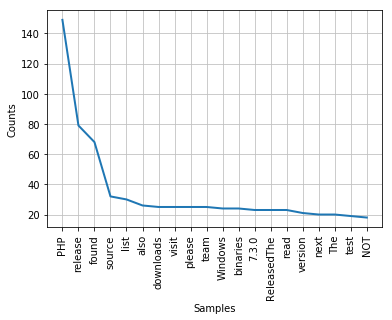

In [9]:
freq.plot(20, cumulative = False)